# **Recurrence Classification**

# Datasets
**Training dataset:**

1.   Metabric Breast Cancer dataset
2.   Duke university Breast Cancer dataset
3.   MSK Breast Cancer dataset



**Validation dataset:** Real patients from Baheya hospital



# **0. Import Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('Recurrence_Yes_No_dataset.csv')

In [ ]:
data.shape

(4690, 13)

In [ ]:
data

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Grade,Mol Subtype,Histological Type,ER,PR,HER2,Tumor Location,Recurrence Free Status,Overall Survival Status (Month),Recurrence Free Status (Month)
0,Pre,T2,N1,II,HER2 enriched,Infiltrating duct carcinoma,Negative,Negative,Positive,Left,Not Recurrence,98.504396,105.709507
1,Pre,T2,N0,III,Triple Negative,Infiltrating duct carcinoma,Negative,Negative,Negative,Left,Not Recurrence,98.504396,105.709507
2,Post,T1,N0,II,Luminal A,Infiltrating duct carcinoma,Positive,Positive,Negative,Left,Not Recurrence,98.504396,105.709507
3,Pre,T2,N1,III,Luminal B,Infiltrating duct carcinoma,Positive,Negative,Positive,Right,Not Recurrence,98.504396,105.709507
4,Post,T1,N0,I,Luminal B,Infiltrating duct carcinoma,Positive,Positive,Positive,Left,Not Recurrence,98.504396,105.709507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,Post,T2,N0,I,Luminal A,Invasive Breast Carcinoma,Positive,Negative,Negative,Left,Recurrence,129.925000,4.930000
4686,Post,T2,N0,II,Luminal A,Invasive Breast Carcinoma,Positive,Negative,Negative,Left,Recurrence,129.925000,16.180000
4687,Post,T1,N0,II,Luminal A,Invasive Breast Carcinoma,Positive,Negative,Negative,Left,Not Recurrence,129.925000,148.428769
4688,Post,T1,N0,II,Luminal A,Invasive Breast Carcinoma,Positive,Negative,Negative,Left,Not Recurrence,129.925000,148.428769


In [ ]:
Baheya_data = pd.read_csv('Final_Baheya_Merged (2).csv')
Baheya_data

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Location,Histological Type,Tumor Grade,ER,PR,HER2,Mol Subtype,Recurrence Free Status (Month),Overall Survival Status (Month),Recurrence_Type,Recurrence Free Status
0,Post,T3,N1,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,27.0,32.0,Normal,Not Recurrence
1,Post,T2,N1,Left,Infiltrating duct carcinoma,II,Negative,Negative,Positive,HER2 enriched,99.0,99.0,Normal,Not Recurrence
2,Post,T2,N2,Left,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,97.0,97.0,Normal,Not Recurrence
3,Pre,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,95.0,96.0,Normal,Not Recurrence
4,Post,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,83.0,88.0,Normal,Not Recurrence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Pre,T3,N0,Right,Infiltrating duct carcinoma,III,Negative,Negative,Negative,Triple Negative,22.0,25.0,Local,Recurrence
464,Pre,T3,N1,Left,Infiltrating duct carcinoma,II,Negative,Negative,Negative,Triple Negative,18.0,17.0,Local,Recurrence
465,Post,T2,N1,Left,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,92.0,92.0,Local,Recurrence
466,Pre,T3,N0,Left,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,4.0,26.0,Local,Recurrence


In [ ]:
Baheya_data = Baheya_data[[
    'Menopausal Status',
    'Tumor Size',
    'Lymph Node Status',
    'Tumor Grade',
    'Mol Subtype',
    #'Histological Type',
    'ER',
    #'PR',
    'HER2',
    #'Tumor Location',
    'Recurrence Free Status',
    'Overall Survival Status (Month)',
    'Recurrence Free Status (Month)'

  ]]

In [ ]:
Baheya_data['Recurrence Free Status'].value_counts()

Recurrence Free Status
Recurrence        316
Not Recurrence    152
Name: count, dtype: int64

# Train

### Preprocessing

**1. Split dataset into features and target**






In [ ]:
X = data.drop(['Recurrence Free Status','Tumor Location','Histological Type','PR'],axis=1)
y = data['Recurrence Free Status']

In [ ]:
X

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Grade,Mol Subtype,ER,HER2,Overall Survival Status (Month),Recurrence Free Status (Month)
0,Pre,T2,N1,II,HER2 enriched,Negative,Positive,98.504396,105.709507
1,Pre,T2,N0,III,Triple Negative,Negative,Negative,98.504396,105.709507
2,Post,T1,N0,II,Luminal A,Positive,Negative,98.504396,105.709507
3,Pre,T2,N1,III,Luminal B,Positive,Positive,98.504396,105.709507
4,Post,T1,N0,I,Luminal B,Positive,Positive,98.504396,105.709507
...,...,...,...,...,...,...,...,...,...
4685,Post,T2,N0,I,Luminal A,Positive,Negative,129.925000,4.930000
4686,Post,T2,N0,II,Luminal A,Positive,Negative,129.925000,16.180000
4687,Post,T1,N0,II,Luminal A,Positive,Negative,129.925000,148.428769
4688,Post,T1,N0,II,Luminal A,Positive,Negative,129.925000,148.428769


**2. Perform one-hot encoding**




In [ ]:
X = pd.get_dummies(X)
X

,Overall Survival Status (Month),Recurrence Free Status (Month),Menopausal Status_Post,Menopausal Status_Pre,Tumor Size_T1,Tumor Size_T2,Tumor Size_T3,Tumor Size_T4,Lymph Node Status_N0,Lymph Node Status_N1,...,Tumor Grade_II,Tumor Grade_III,Mol Subtype_HER2 enriched,Mol Subtype_Luminal A,Mol Subtype_Luminal B,Mol Subtype_Triple Negative,ER_Negative,ER_Positive,HER2_Negative,HER2_Positive
0,98.504396,105.709507,False,True,False,True,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
1,98.504396,105.709507,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,True,False,True,False
2,98.504396,105.709507,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
3,98.504396,105.709507,False,True,False,True,False,False,False,True,...,False,True,False,False,True,False,False,True,False,True
4,98.504396,105.709507,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,129.925000,4.930000,True,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
4686,129.925000,16.180000,True,False,False,True,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
4687,129.925000,148.428769,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
4688,129.925000,148.428769,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Overall Survival Status (Month)  4690 non-null   float64
 1   Recurrence Free Status (Month)   4690 non-null   float64
 2   Menopausal Status_Post           4690 non-null   bool   
 3   Menopausal Status_Pre            4690 non-null   bool   
 4   Tumor Size_T1                    4690 non-null   bool   
 5   Tumor Size_T2                    4690 non-null   bool   
 6   Tumor Size_T3                    4690 non-null   bool   
 7   Tumor Size_T4                    4690 non-null   bool   
 8   Lymph Node Status_N0             4690 non-null   bool   
 9   Lymph Node Status_N1             4690 non-null   bool   
 10  Lymph Node Status_N2             4690 non-null   bool   
 11  Lymph Node Status_N3             4690 non-null   bool   
 12  Tumor Grade_I       

**3. Encode labels in target column**


In [ ]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

**4. Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

**5. Min Max Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

# Transform the 'Survival months' and 'Recurrence Free Status (Month)' columns for training data
X_train_scaled = X_train.copy()  # Make a copy of X_train
X_train_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']] = scaler.transform(X_train_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

# Transform the 'Survival months' and 'Recurrence Free Status (Month)' columns for testing data
X_test_scaled = X_test.copy()  # Make a copy of X_test
X_test_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']] = scaler.transform(X_test_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

In [ ]:
X_test_scaled.isna().sum()

Overall Survival Status (Month)    0
Recurrence Free Status (Month)     0
Menopausal Status_Post             0
Menopausal Status_Pre              0
Tumor Size_T1                      0
Tumor Size_T2                      0
Tumor Size_T3                      0
Tumor Size_T4                      0
Lymph Node Status_N0               0
Lymph Node Status_N1               0
Lymph Node Status_N2               0
Lymph Node Status_N3               0
Tumor Grade_I                      0
Tumor Grade_II                     0
Tumor Grade_III                    0
Mol Subtype_HER2 enriched          0
Mol Subtype_Luminal A              0
Mol Subtype_Luminal B              0
Mol Subtype_Triple Negative        0
ER_Negative                        0
ER_Positive                        0
HER2_Negative                      0
HER2_Positive                      0
dtype: int64

In [ ]:
X_train_scaled

,Overall Survival Status (Month),Recurrence Free Status (Month),Menopausal Status_Post,Menopausal Status_Pre,Tumor Size_T1,Tumor Size_T2,Tumor Size_T3,Tumor Size_T4,Lymph Node Status_N0,Lymph Node Status_N1,...,Tumor Grade_II,Tumor Grade_III,Mol Subtype_HER2 enriched,Mol Subtype_Luminal A,Mol Subtype_Luminal B,Mol Subtype_Triple Negative,ER_Negative,ER_Positive,HER2_Negative,HER2_Positive
2316,-0.824021,-0.722392,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,True,False
2730,1.717001,1.093262,True,False,True,False,False,False,True,False,...,True,False,False,True,False,False,False,True,True,False
1186,-0.295527,-0.391104,False,True,True,False,False,False,False,True,...,False,True,False,True,False,False,False,True,True,False
3028,2.282210,2.408267,True,False,False,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
546,-0.031699,0.277897,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.656632,-0.229604,True,False,True,False,False,False,True,False,...,False,True,False,True,False,False,False,True,True,False
1344,-1.237541,-1.089982,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,True,False,True,False
610,-0.031699,0.277897,True,False,True,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,True
70,-0.031699,0.277897,False,True,False,True,False,False,False,True,...,False,True,False,False,False,True,True,False,True,False


### Models

**RF**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Grid search took {execution_time:.2f} seconds")

# Display the best hyperparameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Retrain the model using the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Grid search took 992.87 seconds
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy found:  0.8483104094739579


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import time

start_time = time.time()

clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_train_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_train_original = label_encoder.inverse_transform(y_train)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 0.77 seconds


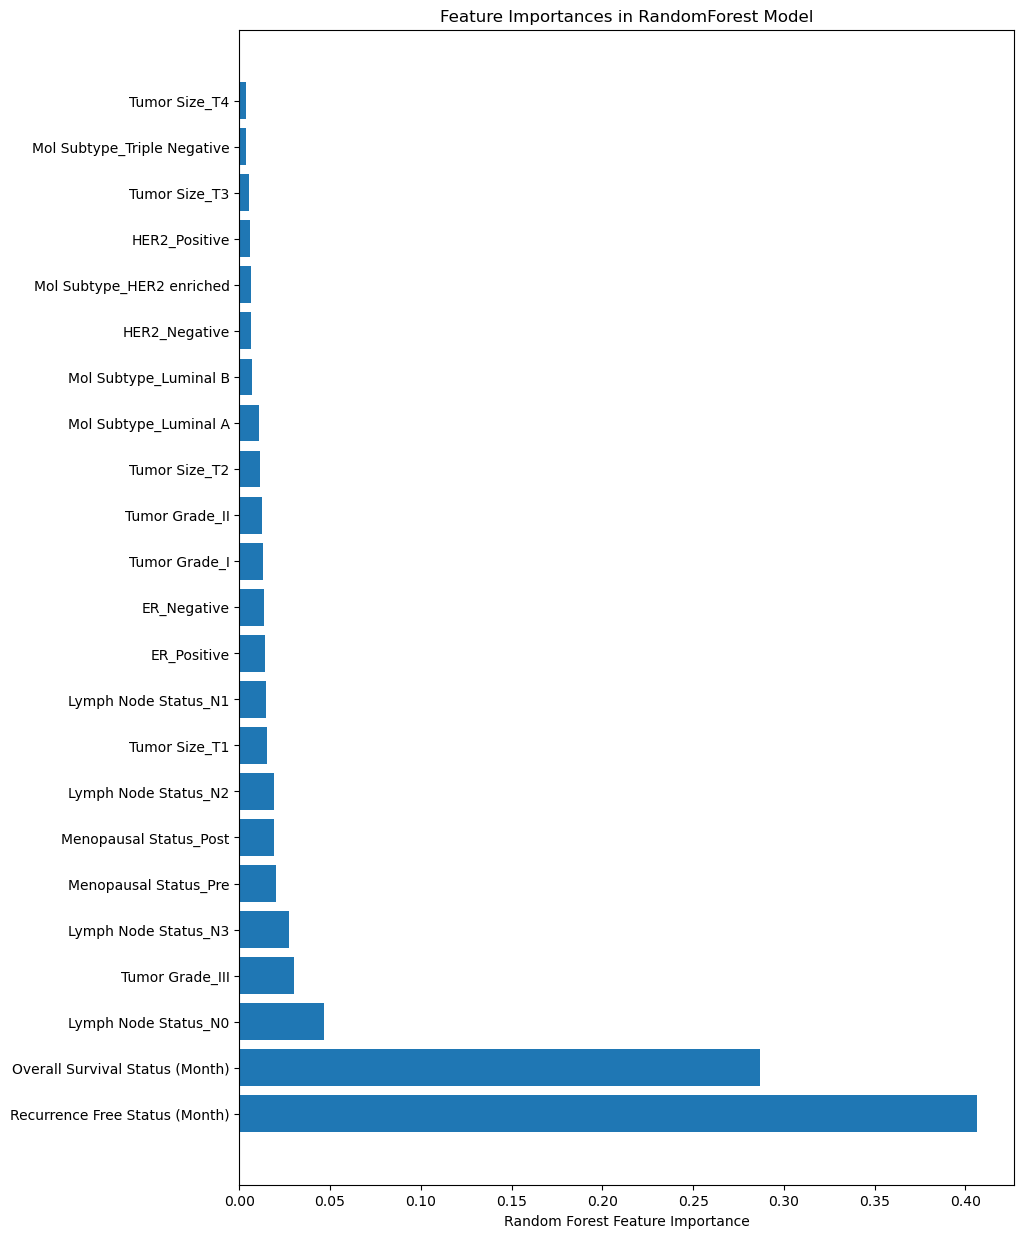

In [ ]:
import numpy as np
# Get feature importances from the model
feature_importances = clf.feature_importances_
features = X_train_scaled.columns  # Ensuring X_train is a DataFrame and has the columns attribute
indices = np.argsort(feature_importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 15))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importances in RandomForest Model")
plt.show()

In [ ]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train_original, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.85410334 0.85106383 0.82066869 0.875      0.82621951 0.86585366
 0.8597561  0.82012195 0.8445122  0.8597561 ]
Mean Accuracy: 0.847705537845652


In [ ]:
train_accuracy_RF = accuracy_score(y_train_original, y_pred_original)
train_report = classification_report(y_train_original, y_pred_original)

print("Training Set Accuracy:", train_accuracy_RF)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.8939993908010966
Training Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.90      0.91      0.90      1805
    Recurrence       0.89      0.88      0.88      1478

      accuracy                           0.89      3283
     macro avg       0.89      0.89      0.89      3283
  weighted avg       0.89      0.89      0.89      3283



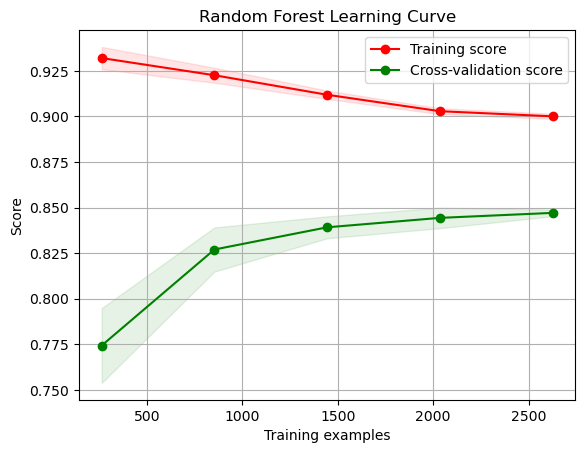

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have already trained your LightGBM model
title = "Random Forest Learning Curve"
plot_learning_curve(clf, title, X_train_scaled, y_train, cv=5)
# Save the plot as SVG
#plt.savefig('Train_CV_rf.svg', format='svg')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open("RF_model.pkl", "wb") as f:
    pickle.dump(clf, f)

**1. LGBM**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Define the LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [20, 30, 40]
}

# Define the GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 3283, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450198 -> initscore=-0.199871
[LightGBM] [Info] Start training from score -0.199871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [ ]:
lgb_model = lgb.LGBMClassifier(learning_rate= 0.05, max_depth = 5, min_child_samples = 20, n_estimators = 300, num_leaves = 30)
# Train the model with the best parameters
lgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_train_scaled)

# Evaluate the model
Train_accuracy_lgbm = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)
print("Accuracy:", Train_accuracy_lgbm)
print("Training Set Classification Report:\n", train_report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 3283, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450198 -> initscore=-0.199871
[LightGBM] [Info] Start training from score -0.199871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

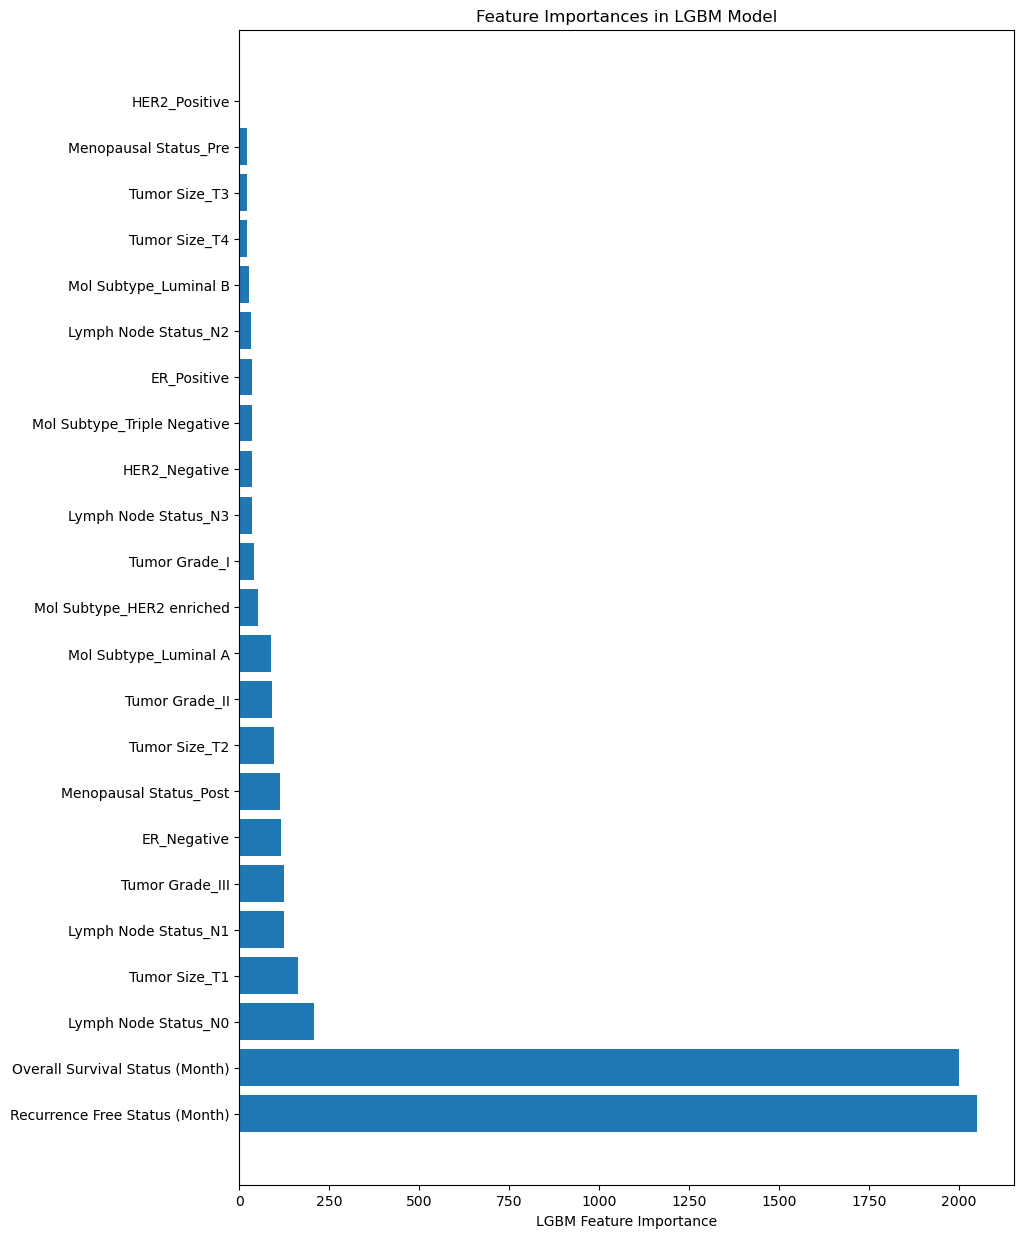

In [ ]:
import numpy as np
# Get feature importances from the model
feature_importances = lgb_model.feature_importances_
features = X_train_scaled.columns  # Ensuring X_train is a DataFrame and has the columns attribute
indices = np.argsort(feature_importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 15))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel("LGBM Feature Importance")
plt.title("Feature Importances in LGBM Model")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lgb_model, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1330, number of negative: 1624
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 2954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450237 -> initscore=-0.199713
[LightGBM] [Info] Start training from score -0.199713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 117, number of negative: 145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.767934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.446565 -> initscore=-0.214560
[LightGBM] [Info] Start training from score -0.214560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 98, number of negative: 164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.813285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 262, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374046 -> initscore=-0.514899
[LightGBM] [Info] Start training from score -0.514899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 369, number of negative: 484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.932399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 853, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432591 -> initscore=-0.271288
[LightGBM] [Info] Start training from score -0.271288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 646, number of negative: 798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.891392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 1444, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.447368 -> initscore=-0.211309
[LightGBM] [Info] Start training from score -0.211309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1182, number of negative: 1444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.850356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 2626, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.450114 -> initscore=-0.200209
[LightGBM] [Info] Start training from score -0.200209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

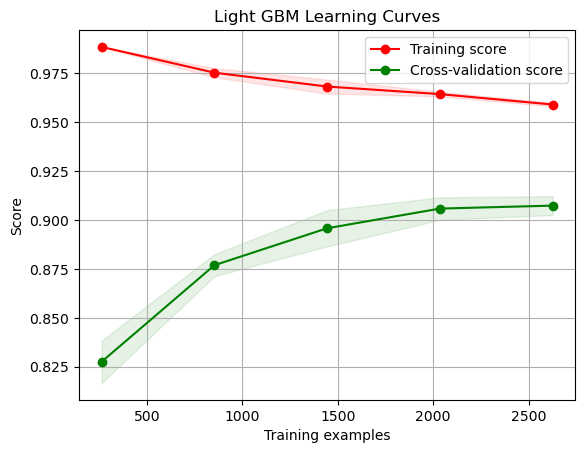

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have already trained your LightGBM model
title = "Light GBM Learning Curves"
plot_learning_curve(lgb_model, title, X_train_scaled, y_train, cv=5)
# Save the plot as SVG
plt.savefig('Train_CV_lgbm.svg', format='svg')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open("LBG_model.pkl", "wb") as f:
    pickle.dump(lgb_model, f)

**2. XGBoost Model**

In [ ]:
pip install xgboost

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import time

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 11],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Grid search took {execution_time:.2f} seconds")

# Display the best hyperparameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Retrain the model using the best hyperparameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid search took 102.63 seconds
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}
Best accuracy found:  0.9113612317630025


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import time

start_time = time.time()

xgb = xgb.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.2)
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 1.84 seconds


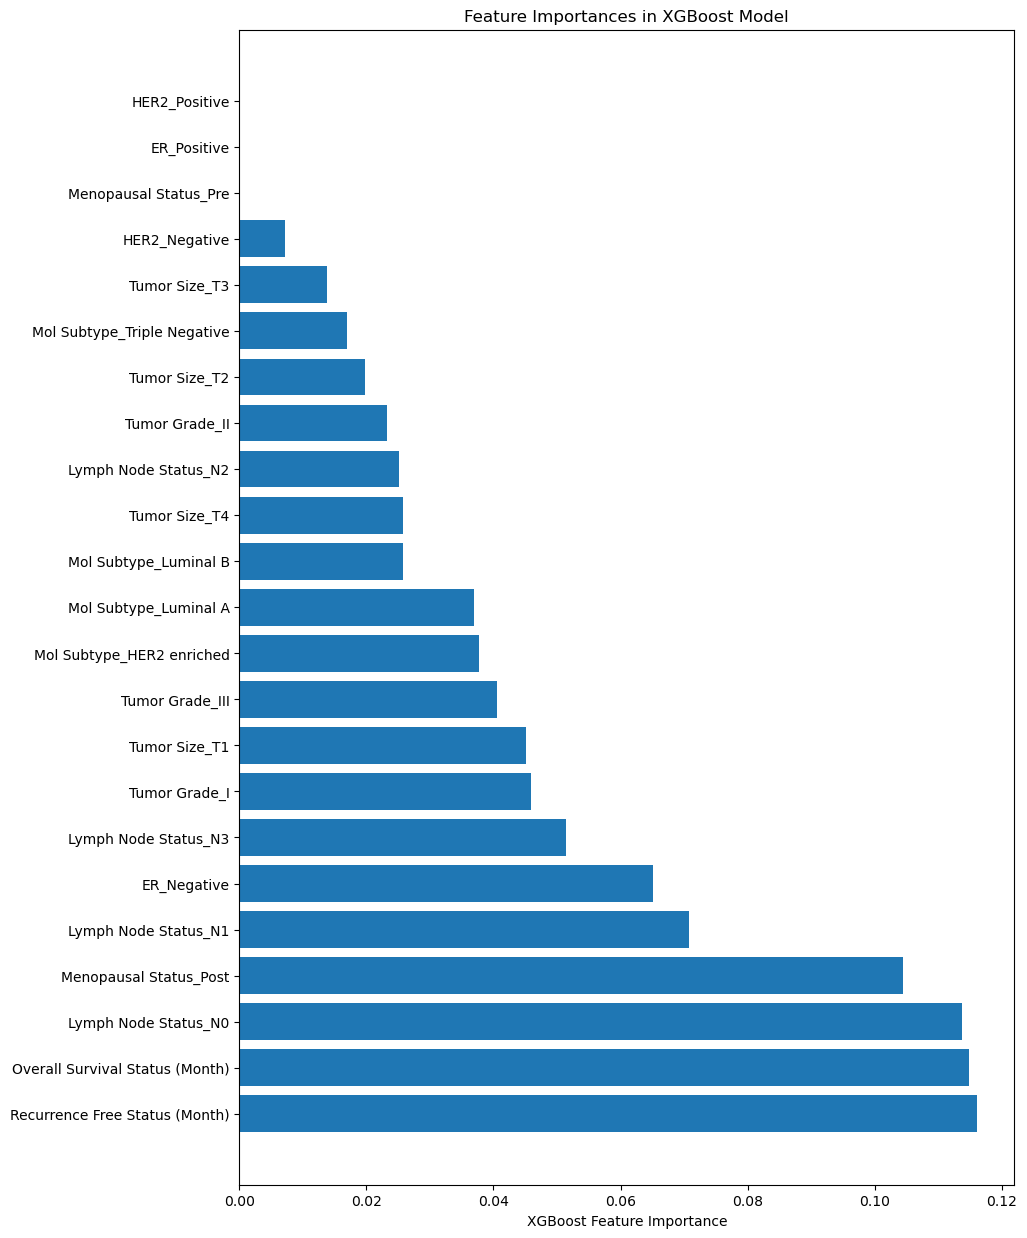

In [ ]:
import numpy as np
# Get feature importances from the model
feature_importances = xgb.feature_importances_
features = X_train_scaled.columns  # Ensuring X_train is a DataFrame and has the columns attribute
indices = np.argsort(feature_importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 15))
plt.barh(features[indices], feature_importances[indices])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importances in XGBoost Model")
plt.show()

In [ ]:
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93617021 0.91489362 0.86930091 0.93902439 0.91463415 0.90853659
 0.92682927 0.9054878  0.92682927 0.90853659]
Mean Accuracy: 0.9150242790421826


In [ ]:
train_accuracy_xgb = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_xgb)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9649710630520865
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1805
           1       0.98      0.95      0.96      1478

    accuracy                           0.96      3283
   macro avg       0.97      0.96      0.96      3283
weighted avg       0.97      0.96      0.96      3283



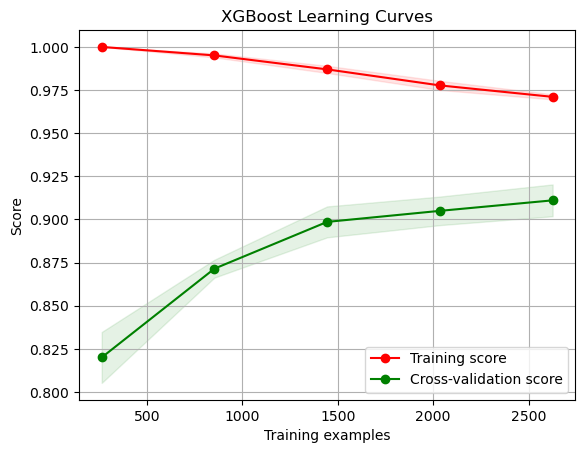

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "XGBoost Learning Curves"
plot_learning_curve(xgb, title, X_train_scaled, y_train, cv=5)
# Save the plot as SVG
plt.savefig('Train_CV_xgb.svg', format='svg')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)



---



**3. Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

# Assuming X_train and y_train are already defined
# If your data is not yet scaled, include a StandardScaler in the pipeline

# Define a pipeline to scale data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Record start time
start_time = time.time()

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Record end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Hyperparameter tuning took {execution_time:.2f} seconds")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_train_scaled)

Hyperparameter tuning took 321.62 seconds
Best parameters found:  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel': 'linear'}
Best cross-validation accuracy: 0.87


In [ ]:
from sklearn.svm import SVC
import time

start_time = time.time()

SVM = SVC(kernel='linear', C=100, gamma=1)
SVM.fit(X_train_scaled, y_train)

y_pred = SVM.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 4.11 seconds


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(SVM, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.88753799 0.87537994 0.84802432 0.93292683 0.86280488 0.83231707
 0.86280488 0.89329268 0.87804878 0.88414634]
Mean Accuracy: 0.8757283712654755


In [ ]:
train_accuracy_svm = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_svm)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.8793786171184892
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1805
           1       0.92      0.80      0.86      1478

    accuracy                           0.88      3283
   macro avg       0.89      0.87      0.88      3283
weighted avg       0.88      0.88      0.88      3283



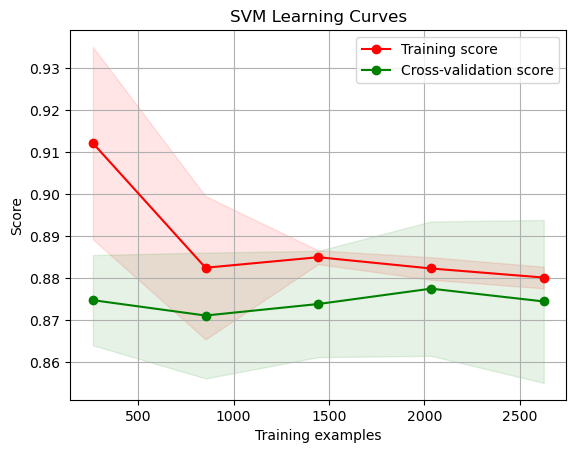

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "SVM Learning Curves"
plot_learning_curve(SVM, title, X_train_scaled, y_train, cv=5)
# Save the plot as SVG
plt.savefig('Train_CV_SVM.svg', format='svg')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open("svm_model.pkl", "wb") as f:
    pickle.dump(SVM, f)



---



**4. KNN Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Grid search took {execution_time:.2f} seconds")

# Display the best hyperparameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Retrain the model using the best hyperparameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Grid search took 0.75 seconds
Best parameters found:  {'n_neighbors': 3}
Best accuracy found:  0.8032292942792442


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f77f067f1a0>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Model training took 0.31 seconds


In [ ]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f77f04e1580>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f77f04e1580>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Cross-Validation Scores: [0.82370821 0.80851064 0.76899696 0.86280488 0.80487805 0.82621951
 0.82012195 0.79573171 0.79573171 0.80792683]
Mean Accuracy: 0.8114630439617466


In [ ]:
train_accuracy_knn = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_knn)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.8949131891562595
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1805
           1       0.89      0.87      0.88      1478

    accuracy                           0.89      3283
   macro avg       0.89      0.89      0.89      3283
weighted avg       0.89      0.89      0.89      3283



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff3061bd9e0>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f36bb0319e0>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff2fbd13f60>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(file

             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4758873f60>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fd7da5399e0>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

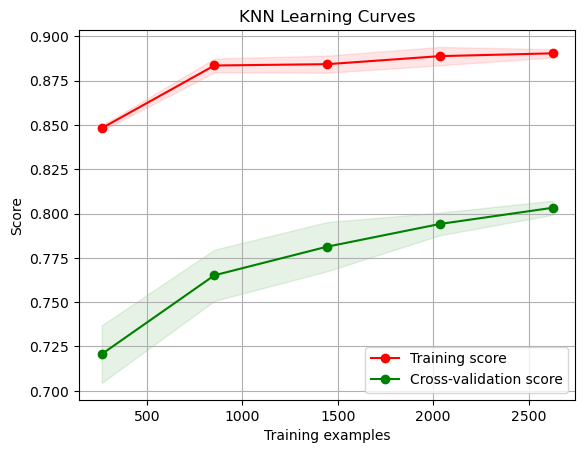

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "KNN Learning Curves"
plot_learning_curve(knn, title, X_train_scaled, y_train, cv=5)
# Save the plot as SVG
plt.savefig('Train_CV_KNN.svg', format='svg')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file using pickle
with open("KNN_model.pkl", "wb") as f:
    pickle.dump(knn, f)



---



**5. NN Model**

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Ensure X_train_scaled, X_test_scaled, y_train, y_test are in numpy array format and of proper dtype
X_train_scaled = np.array(X_train_scaled).astype(np.float32)
X_test_scaled = np.array(X_test_scaled).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# Verify the shape and data type of the arrays
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Data type of X_train_scaled:", X_train_scaled.dtype)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Data type of X_test_scaled:", X_test_scaled.dtype)
print("Shape of y_train:", y_train.shape)
print("Data type of y_train:", y_train.dtype)
print("Shape of y_test:", y_test.shape)
print("Data type of y_test:", y_test.dtype)

Shape of X_train_scaled: (3283, 23)
Data type of X_train_scaled: float32
Shape of X_test_scaled: (1407, 23)
Data type of X_test_scaled: float32
Shape of y_train: (3283,)
Data type of y_train: float32
Shape of y_test: (1407,)
Data type of y_test: float32


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Setup cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, fit_params={'callbacks': [early_stopping]})

# Print cross-validation results
print("Cross-validation scores:", results)
print("Mean cross-validation score:", np.mean(results))

/tmp/ipykernel_11542/4078022374.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)


Cross-validation scores: [0.88449848 0.92705166 0.92097265 0.902439   0.89329267 0.902439
 0.91768295 0.89024389 0.90548778 0.875     ]
Mean cross-validation score: 0.9019108057022095


In [ ]:
# Build the fully connected neural network with Dropout layers
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

# Compile the model with the correct learning rate argument
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Use EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model on the training data
train_loss, train_accuracy_NN = model.evaluate(X_train_scaled, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy_NN:.4f}")

# Evaluate the model on the test data
test_loss, test_accuracy_NN = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy_NN:.4f}")

# Predict on the test data
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/100
52/52 [==============================] - 1s 8ms/step - loss: 0.6258 - accuracy: 0.6366 - val_loss: 0.5177 - val_accuracy: 0.7505
Epoch 2/100
52/52 [==============================] - 0s 5ms/step - loss: 0.4756 - accuracy: 0.7901 - val_loss: 0.3786 - val_accuracy: 0.8323
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8261 - val_loss: 0.3538 - val_accuracy: 0.8657
Epoch 4/100
52/52 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8459 - val_loss: 0.3396 - val_accuracy: 0.8579
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8468 - val_loss: 0.3339 - val_accuracy: 0.8571
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.8626 - val_loss: 0.3247 - val_accuracy: 0.8650
Epoch 7/100
52/52 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8651 - val_loss: 0.3038 - val_accuracy: 0.8770
Epoch 8/100
5

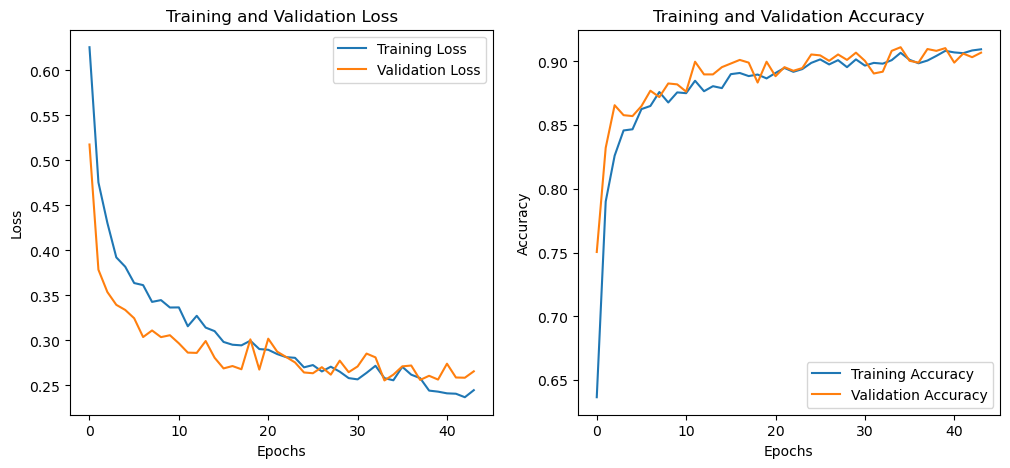

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('NN_training_loss-accuracy.svg', format='svg')
plt.legend()


plt.show()

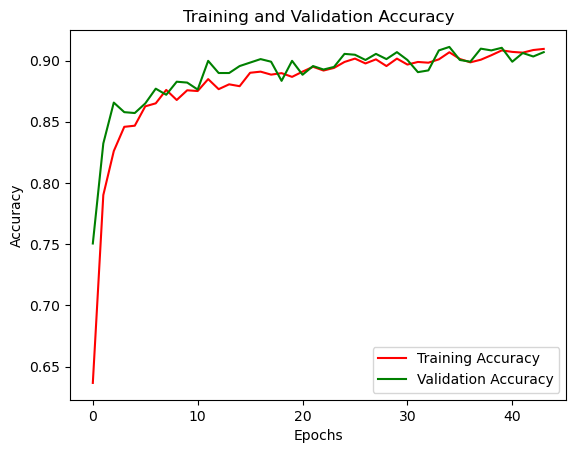

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('NN_training_accuracy.svg', format='svg')
plt.show()


# Test

**RF**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("RF_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy_RF = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", test_accuracy_RF)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.8542999289267946
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       774
         1.0       0.84      0.83      0.84       633

    accuracy                           0.85      1407
   macro avg       0.85      0.85      0.85      1407
weighted avg       0.85      0.85      0.85      1407



/home/nada/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 **1. LGBM**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("LBG_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy_LGBM = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", test_accuracy_LGBM)
print("Test Set Classification Report:\n", test_report)


Test Set Accuracy: 0.9125799573560768
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       774
         1.0       0.91      0.89      0.90       633

    accuracy                           0.91      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.91      0.91      0.91      1407



In [ ]:
import pickle

# Load the saved model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy_XGB = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", test_accuracy_XGB)
print("Test Set Classification Report:\n", test_report)


Test Set Accuracy: 0.9203980099502488
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       774
         1.0       0.92      0.90      0.91       633

    accuracy                           0.92      1407
   macro avg       0.92      0.92      0.92      1407
weighted avg       0.92      0.92      0.92      1407



**3. Support Vector Machine**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("svm_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy_SVM = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", test_accuracy_SVM)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.8813077469793887
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       774
         1.0       0.93      0.80      0.86       633

    accuracy                           0.88      1407
   macro avg       0.89      0.87      0.88      1407
weighted avg       0.89      0.88      0.88      1407



/home/nada/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**4.KNN Model**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("KNN_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy_KNN = accuracy_score(y_test, y_pred_test)
test_report = classification_report(y_test, y_pred_test)

print("Test Set Accuracy:", test_accuracy_KNN)
print("Test Set Classification Report:\n", test_report)


/home/nada/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Set Accuracy: 0.7945984363894811
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       774
         1.0       0.78      0.75      0.77       633

    accuracy                           0.79      1407
   macro avg       0.79      0.79      0.79      1407
weighted avg       0.79      0.79      0.79      1407



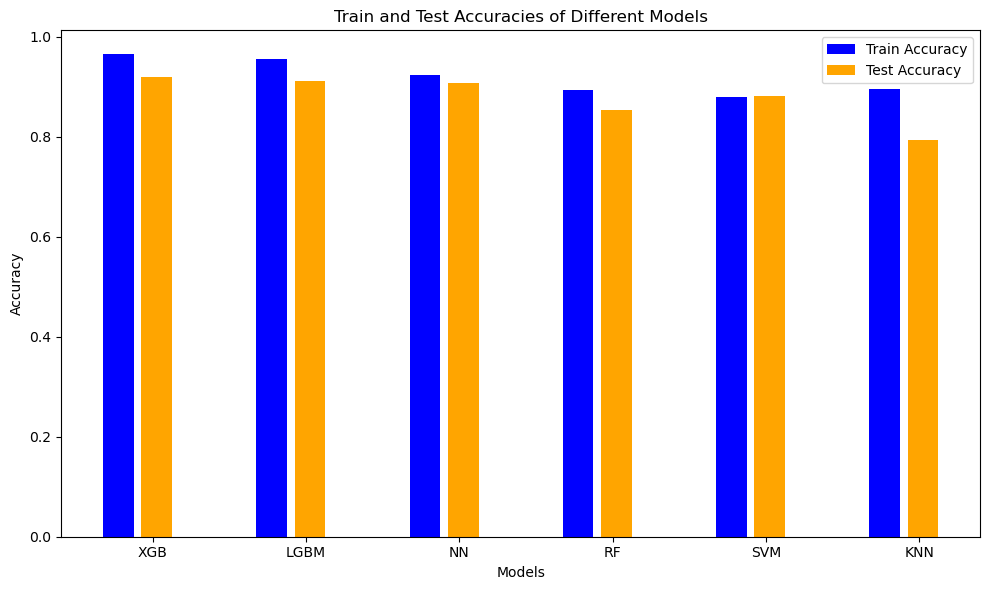

In [ ]:
import matplotlib.pyplot as plt

# Train accuracies
train_accuracies = [train_accuracy_xgb, Train_accuracy_lgbm, train_accuracy_NN, train_accuracy_RF, train_accuracy_svm, train_accuracy_knn]

# Test accuracies
test_accuracies = [test_accuracy_XGB, test_accuracy_LGBM, test_accuracy_NN, test_accuracy_RF, test_accuracy_SVM, test_accuracy_KNN]

# Model names
models = ['XGB', 'LGBM', 'NN', 'RF', 'SVM', 'KNN']

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.2  # Adjust the width of the bars
space = 0.05  # Adjust the space between groups

# Train accuracies (color: blue)
plt.bar([x - bar_width - space/2 for x in range(len(models))], train_accuracies, bar_width, label='Train Accuracy', color='blue')

# Test accuracies (color: orange)
plt.bar([x + space/2 for x in range(len(models))], test_accuracies, bar_width, label='Test Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Different Models')
plt.xticks(range(len(models)), models)  # Adjust x-ticks positions
plt.legend()
plt.tight_layout()

# Save the plot as SVG
plt.savefig('train_test_accuracies.svg', format='svg')

plt.show()




---



---



# Validation

### Preprocessing

**1. Split dataset into features and target**

In [ ]:
X_val = Baheya_data.drop('Recurrence Free Status', axis=1)
y_val = Baheya_data['Recurrence Free Status']

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Menopausal Status                468 non-null    object 
 1   Tumor Size                       468 non-null    object 
 2   Lymph Node Status                468 non-null    object 
 3   Tumor Grade                      468 non-null    object 
 4   Mol Subtype                      468 non-null    object 
 5   ER                               468 non-null    object 
 6   HER2                             468 non-null    object 
 7   Overall Survival Status (Month)  468 non-null    float64
 8   Recurrence Free Status (Month)   468 non-null    float64
dtypes: float64(2), object(7)
memory usage: 33.0+ KB


**2. Perform one-hot encoding**

In [ ]:
X_val = pd.get_dummies(X_val)

In [ ]:
X_val.head()

,Overall Survival Status (Month),Recurrence Free Status (Month),Menopausal Status_Post,Menopausal Status_Pre,Tumor Size_T1,Tumor Size_T2,Tumor Size_T3,Tumor Size_T4,Lymph Node Status_N0,Lymph Node Status_N1,...,Tumor Grade_II,Tumor Grade_III,Mol Subtype_HER2 enriched,Mol Subtype_Luminal A,Mol Subtype_Luminal B,Mol Subtype_Triple Negative,ER_Negative,ER_Positive,HER2_Negative,HER2_Positive
0,32.0,27.0,True,False,False,False,True,False,False,True,...,True,False,False,True,False,False,False,True,True,False
1,99.0,99.0,True,False,False,True,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,97.0,97.0,True,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
3,96.0,95.0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,True,True,False
4,88.0,83.0,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,True,True,False


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Overall Survival Status (Month)  468 non-null    float64
 1   Recurrence Free Status (Month)   468 non-null    float64
 2   Menopausal Status_Post           468 non-null    bool   
 3   Menopausal Status_Pre            468 non-null    bool   
 4   Tumor Size_T1                    468 non-null    bool   
 5   Tumor Size_T2                    468 non-null    bool   
 6   Tumor Size_T3                    468 non-null    bool   
 7   Tumor Size_T4                    468 non-null    bool   
 8   Lymph Node Status_N0             468 non-null    bool   
 9   Lymph Node Status_N1             468 non-null    bool   
 10  Lymph Node Status_N2             468 non-null    bool   
 11  Lymph Node Status_N3             468 non-null    bool   
 12  Tumor Grade_I         

**3. Encode labels in target column**

In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_val = label_encoder.fit_transform(y_val)

**4. Min Max Scaler**

In [ ]:
X_val_scaled = X_val.copy()  # Make a copy of X_test
X_val_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']] = scaler.transform(X_val_scaled[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

In [ ]:
X_val_scaled.isna().sum()

Overall Survival Status (Month)    0
Recurrence Free Status (Month)     0
Menopausal Status_Post             0
Menopausal Status_Pre              0
Tumor Size_T1                      0
Tumor Size_T2                      0
Tumor Size_T3                      0
Tumor Size_T4                      0
Lymph Node Status_N0               0
Lymph Node Status_N1               0
Lymph Node Status_N2               0
Lymph Node Status_N3               0
Tumor Grade_I                      0
Tumor Grade_II                     0
Tumor Grade_III                    0
Mol Subtype_HER2 enriched          0
Mol Subtype_Luminal A              0
Mol Subtype_Luminal B              0
Mol Subtype_Triple Negative        0
ER_Negative                        0
ER_Positive                        0
HER2_Negative                      0
HER2_Positive                      0
dtype: int64

In [ ]:
X_val_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Overall Survival Status (Month)  468 non-null    float64
 1   Recurrence Free Status (Month)   468 non-null    float64
 2   Menopausal Status_Post           468 non-null    bool   
 3   Menopausal Status_Pre            468 non-null    bool   
 4   Tumor Size_T1                    468 non-null    bool   
 5   Tumor Size_T2                    468 non-null    bool   
 6   Tumor Size_T3                    468 non-null    bool   
 7   Tumor Size_T4                    468 non-null    bool   
 8   Lymph Node Status_N0             468 non-null    bool   
 9   Lymph Node Status_N1             468 non-null    bool   
 10  Lymph Node Status_N2             468 non-null    bool   
 11  Lymph Node Status_N3             468 non-null    bool   
 12  Tumor Grade_I         

### Models

**RF**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("RF_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_RF = loaded_model.predict(X_val_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_val, y_pred_RF)

print("Validation Set Accuracy:", test_accuracy)

Validation Set Accuracy: 0.8376068376068376


In [ ]:
y_pred_RF = clf.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_RF)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8376068376068376
Testing Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.83      0.63      0.72       152
    Recurrence       0.84      0.94      0.89       316

      accuracy                           0.84       468
     macro avg       0.83      0.78      0.80       468
  weighted avg       0.84      0.84      0.83       468



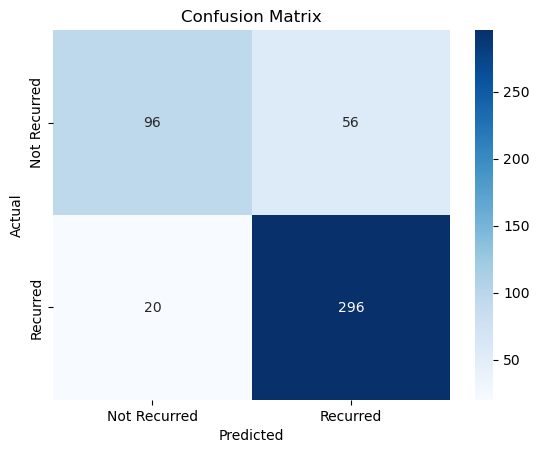

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

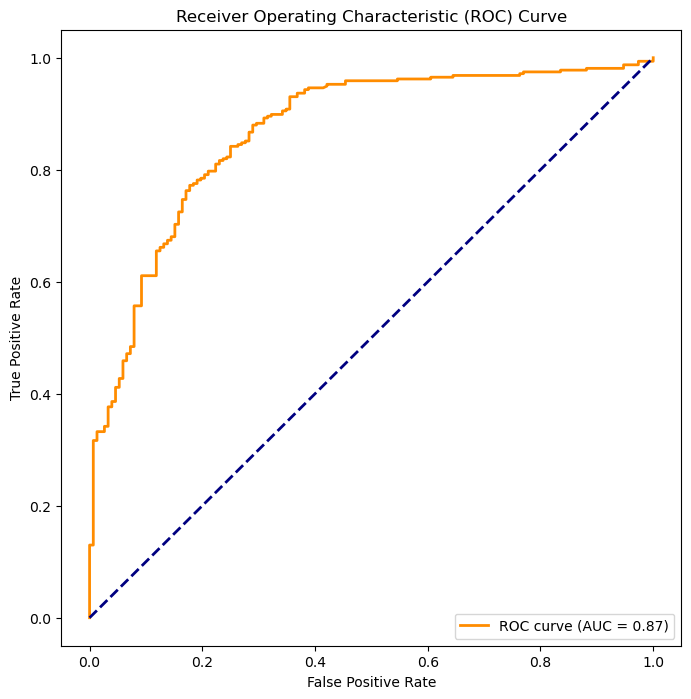

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = clf.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**1. LGBM**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("LBG_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_LGBM = loaded_model.predict(X_val_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_val, y_pred_LGBM)

print("Validation Set Accuracy:", test_accuracy)


Validation Set Accuracy: 0.8461538461538461


In [ ]:
y_pred_LGBM = lgb_model.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_LGBM)
y_val_original = label_encoder.inverse_transform(y_val)

val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Validation Set Accuracy:", val_accuracy)
print("Validation Set Classification Report:\n", val_report)

Validation Set Accuracy: 0.8461538461538461
Validation Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.77      0.76      0.76       152
    Recurrence       0.88      0.89      0.89       316

      accuracy                           0.85       468
     macro avg       0.83      0.82      0.82       468
  weighted avg       0.85      0.85      0.85       468



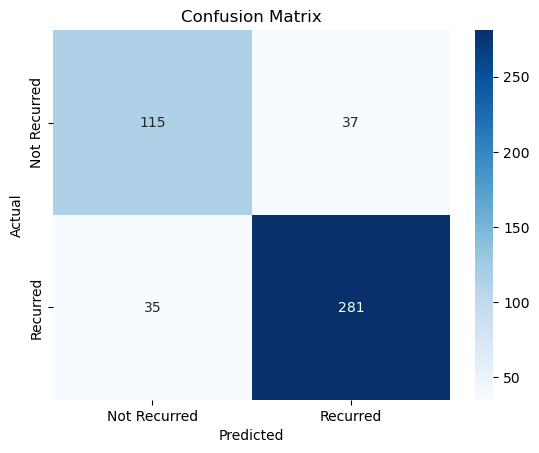

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

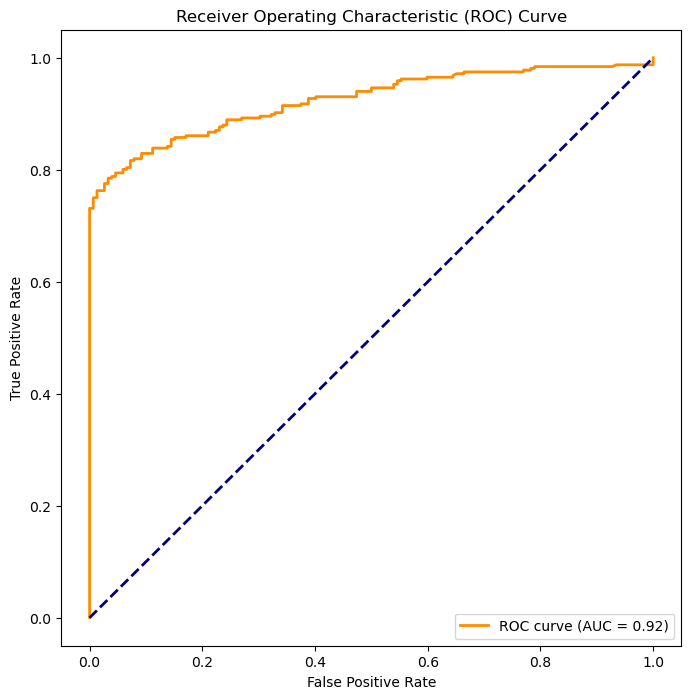

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = lgb_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**2. XGBoost Model**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_XGB = loaded_model.predict(X_val_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_val, y_pred_XGB)

print("Validation Set Accuracy:", test_accuracy)


Validation Set Accuracy: 0.8226495726495726


In [ ]:
y_pred_XGB = xgb.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_XGB)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8226495726495726
Testing Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.72      0.74      0.73       152
    Recurrence       0.87      0.86      0.87       316

      accuracy                           0.82       468
     macro avg       0.80      0.80      0.80       468
  weighted avg       0.82      0.82      0.82       468



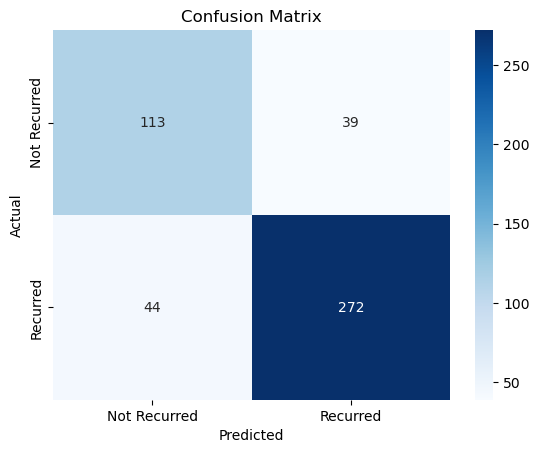

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred_XGB)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

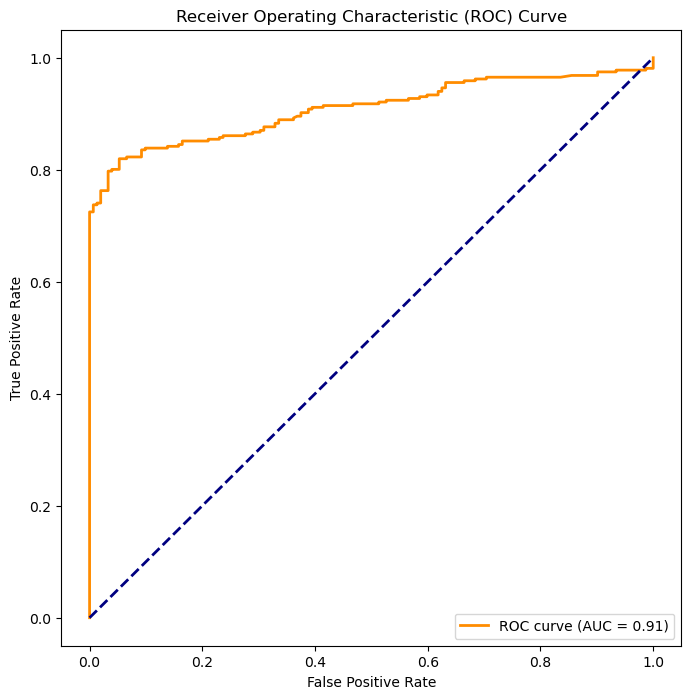

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = xgb.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**3. Support Vector Machine Model**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("svm_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_SVM = loaded_model.predict(X_val_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_val, y_pred_SVM)

print("Validation Set Accuracy:", test_accuracy)


Validation Set Accuracy: 0.7970085470085471


In [ ]:
y_pred_SVM = SVM.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_SVM)
y_val_original = label_encoder.inverse_transform(y_val)

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.7970085470085471
Testing Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.64      0.84      0.73       152
    Recurrence       0.91      0.78      0.84       316

      accuracy                           0.80       468
     macro avg       0.78      0.81      0.78       468
  weighted avg       0.82      0.80      0.80       468



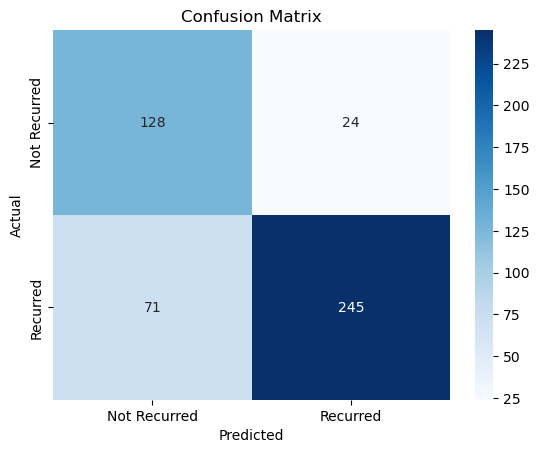

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred_SVM)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

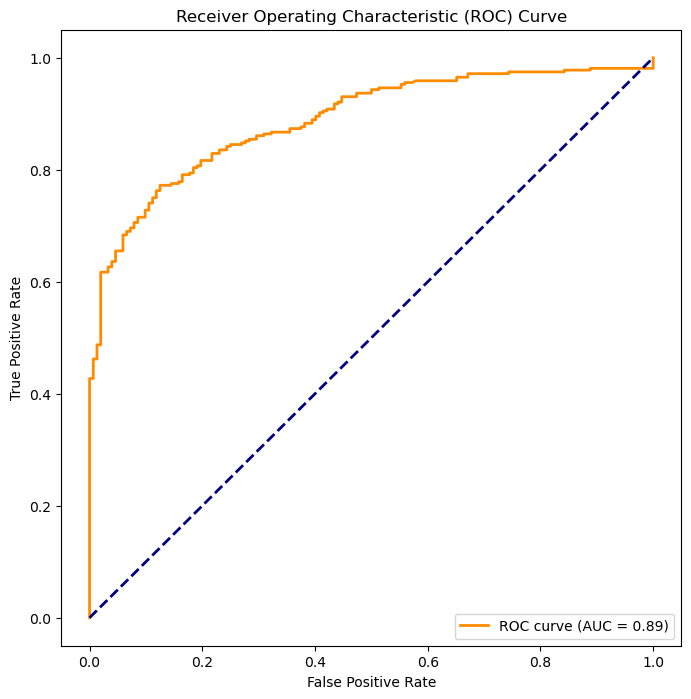

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming SVM is your SVM classifier and X_val_scaled, y_val are your validation set
y_val_pred_proba = SVM.predict_proba(X_val_scaled)[:, 1] if hasattr(SVM, 'predict_proba') else SVM.decision_function(X_val_scaled)

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**4. KNN Model**

In [ ]:
import pickle

# Load the saved model from the pickle file
with open("KNN_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Test the loaded model
y_pred_KNN = loaded_model.predict(X_val_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_val, y_pred_KNN)

print("Validation Set Accuracy:", test_accuracy)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ca49d6700>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

Validation Set Accuracy: 0.7435897435897436


In [ ]:
y_pred_KNN = knn.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_KNN)
y_val_original = label_encoder.inverse_transform(y_val)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3ca48d9120>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

In [ ]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Validation Set Accuracy:", val_accuracy)
print("Validation Set Classification Report:\n", val_report)

Validation Set Accuracy: 0.7435897435897436
Validation Set Classification Report:
                 precision    recall  f1-score   support

Not Recurrence       0.58      0.74      0.65       152
    Recurrence       0.86      0.75      0.80       316

      accuracy                           0.74       468
     macro avg       0.72      0.74      0.72       468
  weighted avg       0.77      0.74      0.75       468



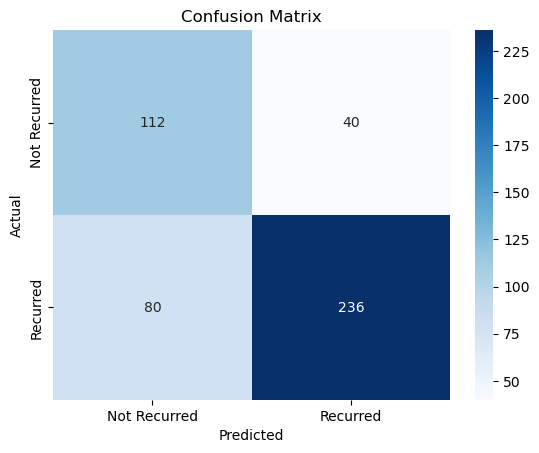

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3c807b82c0>
Traceback (most recent call last):
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/nada/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 's

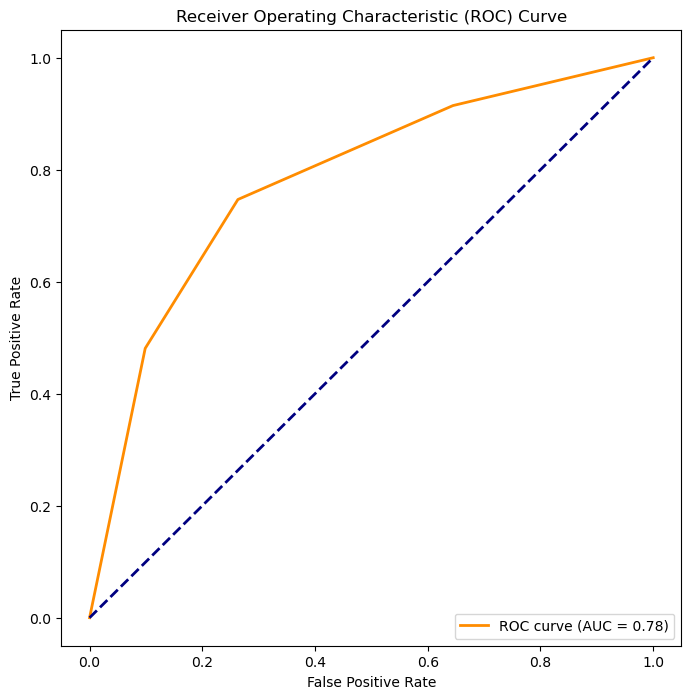

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = knn.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**5. NN Model**

In [ ]:
y_val = np.array(y_val)  # Convert y_val to a NumPy array if it's not already

# Ensure X_val_scaled contains only float values
X_val_scaled = X_val_scaled.astype(np.float32)

# Predict on the validation set
y_pred_NN = model.predict(X_val_scaled)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)

# Generate classification report
val_report = classification_report(y_val, (y_pred_NN > 0.5).astype(int))

# Print validation metrics
print(f"Validation Loss: {val_loss:.4f}")
print("Validation Set Accuracy:", val_accuracy)
print("Validation Set Classification Report:\n", val_report)


15/15 [==============================] - 0s 808us/step - loss: 0.4040 - accuracy: 0.8312
Validation Loss: 0.4040
Validation Set Accuracy: 0.8311966061592102
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       152
           1       0.91      0.83      0.87       316

    accuracy                           0.83       468
   macro avg       0.81      0.83      0.82       468
weighted avg       0.84      0.83      0.83       468



15/15 [==============================] - 0s 877us/step


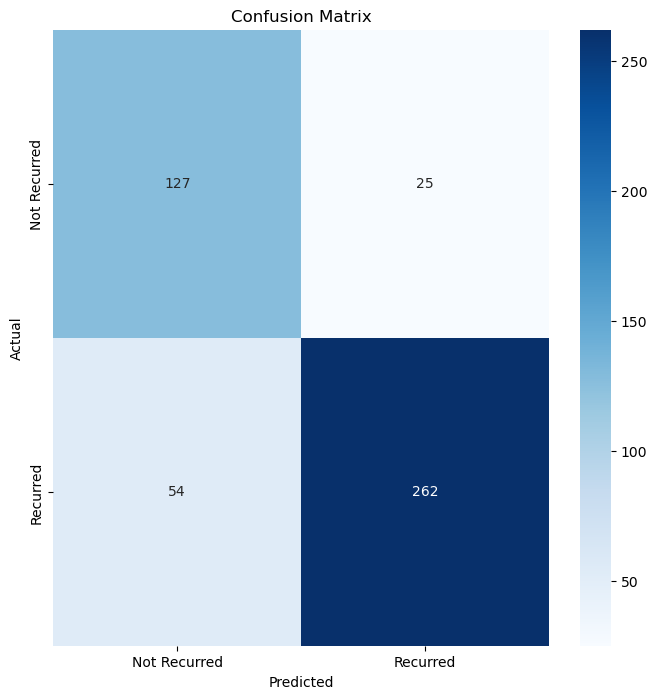

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_val_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recurred', 'Recurred'], yticklabels=['Not Recurred', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


15/15 [==============================] - 0s 900us/step


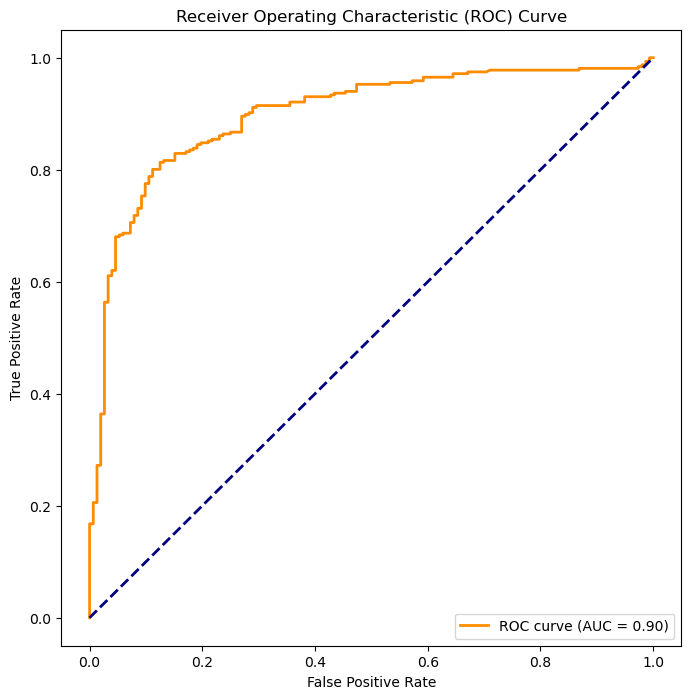

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = model.predict(X_val_scaled)[:, 0]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**ROC Combined**

15/15 [==============================] - 0s 1ms/step


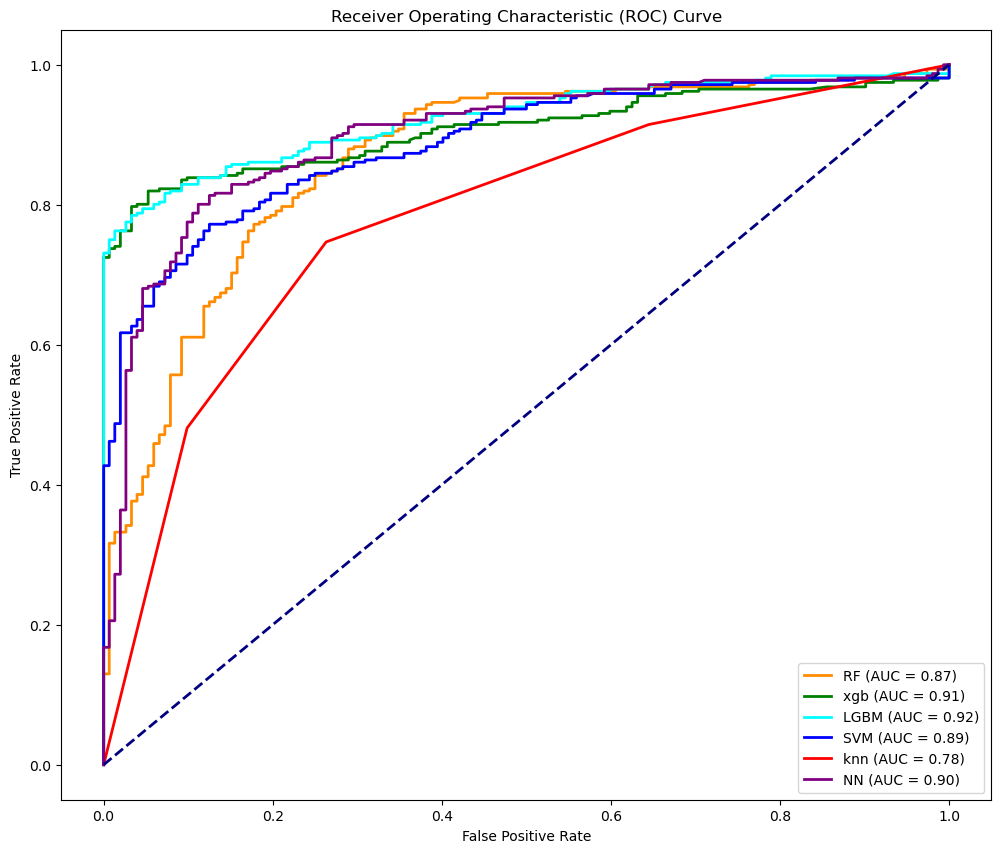

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for clf
y_val_pred_proba_clf = clf.predict_proba(X_val_scaled)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_val, y_val_pred_proba_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)


# Plot ROC curve for xgb
y_val_pred_proba_xgb = xgb.predict_proba(X_val_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_val_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Predict probabilities on the validation set
y_val_pred_proba_lgb = lgb_model.predict_proba(X_val_scaled)[:, 1]
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_val, y_val_pred_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve for SVM
y_val_pred_proba_svm = SVM.predict_proba(X_val_scaled)[:, 1] if hasattr(SVM, 'predict_proba') else SVM.decision_function(X_val_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_val_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for knn
y_val_pred_proba_knn = knn.predict_proba(X_val_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_val_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for model
y_val_pred_proba_model = model.predict(X_val_scaled)[:, 0]
fpr_model, tpr_model, thresholds_model = roc_curve(y_val, y_val_pred_proba_model)
roc_auc_model = auc(fpr_model, tpr_model)

# Combine all ROC curves in one plot
plt.figure(figsize=(12, 10))

plt.plot(fpr_clf, tpr_clf, color='darkorange', lw=2, label='RF (AUC = {:.2f})'.format(roc_auc_clf))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='xgb (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_lgb, tpr_lgb, color='cyan', lw=2, label='LGBM (AUC = {:.2f})'.format(roc_auc_lgb))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='knn (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_model, tpr_model, color='purple', lw=2, label='NN (AUC = {:.2f})'.format(roc_auc_model))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_Combined.svg', format='svg')
plt.show()

**Combined Eval Matrix**

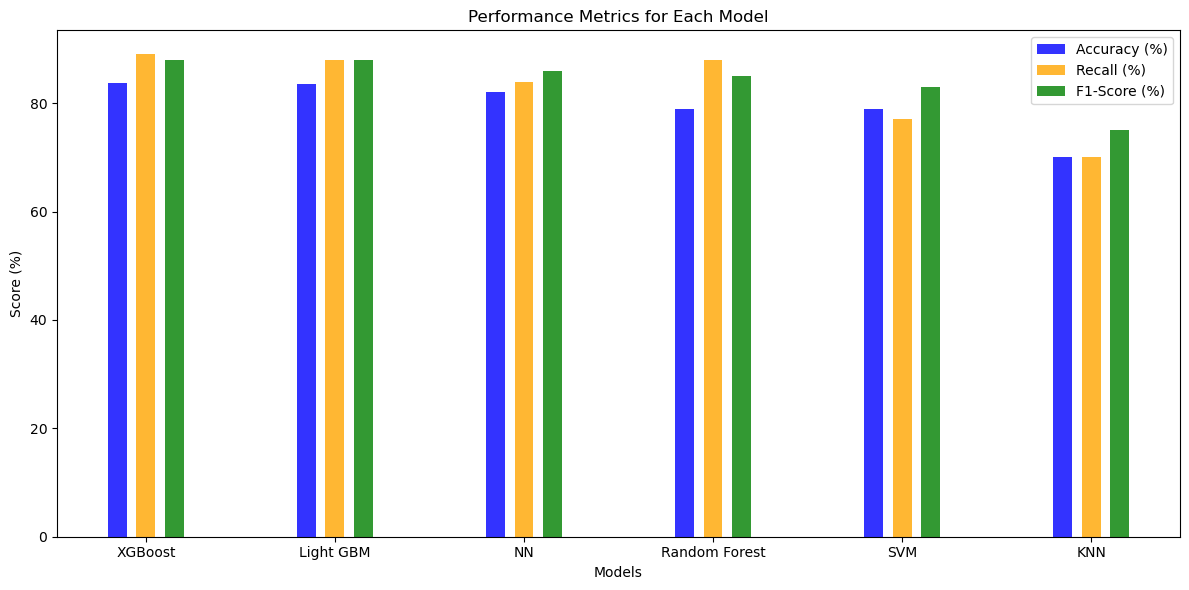

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['XGBoost', 'Light GBM', 'NN', 'Random Forest', 'SVM', 'KNN']
metrics = ['Accuracy (%)', 'Recall (%)', 'F1-Score (%)']
values = np.array([
    [83.7, 83.5, 82, 79, 79, 70],
    [89, 88, 84, 88, 77, 70],
    [88, 88, 86, 85, 83, 75]
])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.1  # thinner bars
opacity = 0.8
space = 0.05  # space between the bars
colors = ['blue', 'orange', 'green']  # Blue, orange, green

for i, metric in enumerate(metrics):
    rects = ax.bar(np.arange(len(models)) + (i * (bar_width + space)), values[i], bar_width,
                   alpha=opacity, color=colors[i], label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Score (%)')
ax.set_title('Performance Metrics for Each Model')
ax.set_xticks(np.arange(len(models)) + ((len(metrics) - 1) * (bar_width + space)) / 2)  # Center x-ticks
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.savefig('Evaluation_Metrics_all.svg', format='svg')
plt.show()


# **Combined Confusion plot**

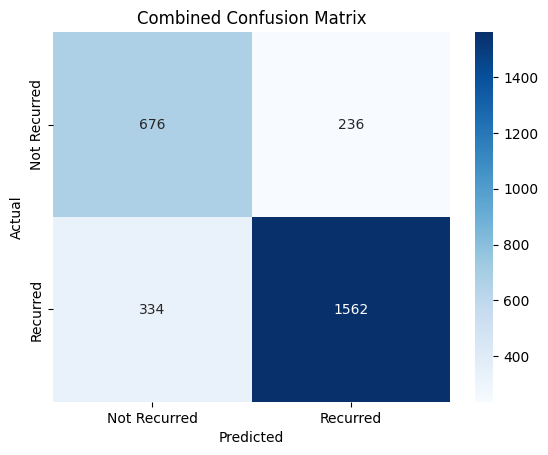

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrices for each model
conf_matrix_rf = np.array([[90, 62],
                            [34, 282]])

conf_matrix_xgboost = np.array([[112, 40],
                                 [36, 280]])

conf_matrix_svm = np.array([[129, 23],
                             [74, 242]])

conf_matrix_knn = np.array([[113, 39],
                             [101, 215]])

conf_matrix_nn = np.array([[119, 33],
                            [51, 265]])

conf_matrix_lgbm = np.array([[113, 39],
                            [38, 278]])


# Sum up corresponding cells
combined_conf_matrix = conf_matrix_rf + conf_matrix_xgboost + conf_matrix_svm + conf_matrix_knn + conf_matrix_nn + conf_matrix_lgbm

import seaborn as sns
import matplotlib.pyplot as plt


# Plotting
class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(combined_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Combined Confusion Matrix')
plt.savefig('Combined CM.svg', format='svg')
plt.show()



# **Save the predictions**

In [ ]:
import numpy as np

# Assuming y_pred_RF, y_pred_XG, y_pred_SVM, y_pred_KNN, y_pred_NN are the predictions

# Save Random Forest predictions
np.save('y_pred_RF.npy', y_pred_RF)

# Save XGBoost predictions
np.save('y_pred_XG.npy', y_pred_XGB)

# Save SVM predictions
np.save('y_pred_SVM.npy', y_pred_SVM)

# Save KNN predictions
np.save('y_pred_KNN.npy', y_pred_KNN)

# Save Neural Network predictions
np.save('y_pred_NN.npy', y_pred_NN)

np.save('y_pred_LGBM.npy', y_pred_LGBM)

# **P-Value Test**

In [ ]:
# Load predictions from files
y_pred_RF = np.load('y_pred_RF.npy')
y_pred_XG = np.load('y_pred_XG.npy')
y_pred_SVM = np.load('y_pred_SVM.npy')
y_pred_KNN = np.load('y_pred_KNN.npy')
y_pred_NN = np.load('y_pred_NN.npy')
y_pred_LGBM = np.load('y_pred_LGBM.npy')

In [ ]:
Baheya = pd.read_csv('/content/Final_Baheya_Merged (2).csv')
Baheya.head()

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Location,Histological Type,Tumor Grade,ER,PR,HER2,Mol Subtype,Recurrence Free Status (Month),Overall Survival Status (Month),Recurrence_Type,Recurrence Free Status
0,Post,T3,N1,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,27.0,32.0,Normal,Not Recurrence
1,Post,T2,N1,Left,Infiltrating duct carcinoma,II,Negative,Negative,Positive,HER2 enriched,99.0,99.0,Normal,Not Recurrence
2,Post,T2,N2,Left,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,97.0,97.0,Normal,Not Recurrence
3,Pre,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,95.0,96.0,Normal,Not Recurrence
4,Post,T4,N2,Right,Infiltrating duct carcinoma,II,Positive,Positive,Negative,Luminal A,83.0,88.0,Normal,Not Recurrence


In [ ]:
Baheya = Baheya.drop('Recurrence_Type', axis=1)

In [ ]:
Baheya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Menopausal Status                468 non-null    object 
 1   Tumor Size                       468 non-null    object 
 2   Lymph Node Status                468 non-null    object 
 3   Tumor Location                   468 non-null    object 
 4   Histological Type                468 non-null    object 
 5   Tumor Grade                      468 non-null    object 
 6   ER                               468 non-null    object 
 7   PR                               468 non-null    object 
 8   HER2                             468 non-null    object 
 9   Mol Subtype                      468 non-null    object 
 10  Recurrence Free Status (Month)   468 non-null    float64
 11  Overall Survival Status (Month)  468 non-null    float64
 12  Recurrence Free Status

In [ ]:
import numpy as np

Baheya['Recurrence Free Status'] = np.where(Baheya['Recurrence Free Status'] == 'Recurrence', 1, 0)

# Extract the modified target column as an array
true_labels = Baheya['Recurrence Free Status'].values

# Print the modified array
print(true_labels)
len(true_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


468

In [ ]:
print(y_pred_XG)
len(y_pred_XG)

[1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1]


468

# **Create contingency table**

# **RF**

In [ ]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_RF):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_RF = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_RF)

Contingency Table:
[[296, 56], [20, 96]]


# **XGB**

In [ ]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_XG):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_XGB = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_XGB)

Contingency Table:
[[272, 39], [44, 113]]


# **SVM**

In [ ]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_SVM):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_SVM = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_SVM)

Contingency Table:
[[245, 24], [71, 128]]


# **KNN**

In [ ]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_KNN):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_KNN = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_KNN)


Contingency Table:
[[236, 40], [80, 112]]


# **LGBM**

In [ ]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_LGBM):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_LGBM = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_LGBM)


Contingency Table:
[[281, 37], [35, 115]]


# **NN**

In [ ]:
import numpy as np

# Assuming y_pred is the array of predictions from your NN model

# Convert probabilities to class labels using a threshold of 0.5
y_pred_NN = np.where(y_pred_NN >= 0.5, 1, 0)
# Flatten the predictions of the neural network model into a single list
y_pred_NN = y_pred_NN.flatten()

In [ ]:
print(y_pred_NN)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


In [ ]:

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_NN):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_NN = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_NN)


Contingency Table:
[[264, 18], [52, 134]]


# **mcnemar test**

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

p_values = {}

# Calculate p-value for Random Forest model
p_value_rf = mcnemar(contingency_table_RF, exact=True).pvalue
p_values['Random Forest'] = p_value_rf

# Calculate p-value for XGBoost model
p_value_xgb = mcnemar(contingency_table_XGB, exact=True).pvalue
p_values['XGBoost'] = p_value_xgb

# Calculate p-value for SVM model
p_value_svm = mcnemar(contingency_table_SVM, exact=True).pvalue
p_values['SVM'] = p_value_svm

# Calculate p-value for KNN model
p_value_knn = mcnemar(contingency_table_KNN, exact=True).pvalue
p_values['KNN'] = p_value_knn

# Calculate p-value for NN model
p_value_NN = mcnemar(contingency_table_NN, exact=True).pvalue
p_values['NN'] = p_value_NN

# Calculate p-value for NN model
p_value_LGBM = mcnemar(contingency_table_LGBM, exact=True).pvalue
p_values['LGBM'] = p_value_LGBM

# Print the p-values
for model, p_value in p_values.items():
    print(f"P-value for {model}:", p_value)


P-value for Random Forest: 4.3689322062244415e-05
P-value for XGBoost: 0.6608836477612154
P-value for SVM: 1.4640982465812788e-06
P-value for KNN: 0.00033040001839131815
P-value for NN: 5.849547318695842e-05
P-value for LGBM: 0.906294324703081


# **Wilcoxon test**

In [ ]:
from scipy.stats import wilcoxon

# Model predictions for each model (binary predictions)
model_predictions = [y_pred_RF, y_pred_XG, y_pred_SVM, y_pred_KNN, y_pred_NN, y_pred_LGBM]
model_names = ['Random Forest', 'XGBoost', 'SVM', 'KNN', 'Neural Network', 'LGBM']

# Check lengths before performing the test
if len(true_labels) != len(model_predictions[0]):
    raise ValueError("The number of true labels does not match the length of predictions.")

# Perform Wilcoxon signed-rank test for each model
for model_name, predictions in zip(model_names, model_predictions):
    statistic, p_value = wilcoxon(true_labels, predictions)
    print(f"Model: {model_name}")
    print(f"W-statistic: {statistic}")
    print(f"P-value: {p_value}")

Model: Random Forest
W-statistic: 770.0
P-value: 3.635795520299531e-05
Model: XGBoost
W-statistic: 1638.0
P-value: 0.5831280913801375
Model: SVM
W-statistic: 1152.0
P-value: 1.4205593711415776e-06
Model: KNN
W-statistic: 2420.0
P-value: 0.0002607296328553162
Model: Neural Network
W-statistic: 639.0
P-value: 4.828490292616592e-05
Model: LGBM
W-statistic: 1277.5
P-value: 0.8136637157667919
